In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os

print(os.listdir("./ranked-matches"))

['stats1.csv', 'champs.csv', 'stats2.csv', 'participants.csv', 'matches.csv', 'teamstats.csv', 'teambans.csv']


In [2]:
CHAMP = pd.read_csv("./ranked-matches/champs.csv")

In [3]:
champ_id = CHAMP.set_index('id')['name'].to_dict()
champ_id

{1: 'Annie',
 2: 'Olaf',
 3: 'Galio',
 4: 'Twisted Fate',
 5: 'Xin Zhao',
 6: 'Urgot',
 7: 'LeBlanc',
 8: 'Vladimir',
 9: 'Fiddlesticks',
 10: 'Kayle',
 11: 'Master Yi',
 12: 'Alistar',
 13: 'Ryze',
 14: 'Sion',
 15: 'Sivir',
 16: 'Soraka',
 17: 'Teemo',
 18: 'Tristana',
 19: 'Warwick',
 20: 'Nunu',
 21: 'Miss Fortune',
 22: 'Ashe',
 23: 'Tryndamere',
 24: 'Jax',
 25: 'Morgana',
 26: 'Zilean',
 27: 'Singed',
 28: 'Evelynn',
 29: 'Twitch',
 30: 'Karthus',
 31: 'ChoGath',
 32: 'Amumu',
 33: 'Rammus',
 34: 'Anivia',
 35: 'Shaco',
 36: 'DrMundo',
 37: 'Sona',
 38: 'Kassadin',
 39: 'Irelia',
 40: 'Janna',
 41: 'Gangplank',
 42: 'Corki',
 43: 'Karma',
 44: 'Taric',
 45: 'Veigar',
 48: 'Trundle',
 50: 'Swain',
 51: 'Caitlyn',
 53: 'Blitzcrank',
 54: 'Malphite',
 55: 'Katarina',
 56: 'Nocturne',
 57: 'Maokai',
 58: 'Renekton',
 59: 'Jarvan IV',
 60: 'Elise',
 61: 'Orianna',
 62: 'Wukong',
 63: 'Brand',
 64: 'Lee Sin',
 67: 'Vayne',
 68: 'Rumble',
 69: 'Cassiopeia',
 72: 'Skarner',
 74: 'Heimer

In [4]:
PLAYERS = pd.read_csv("./ranked-matches//participants.csv")
PLAYERS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834520 entries, 0 to 1834519
Data columns (total 8 columns):
id            int64
matchid       int64
player        int64
championid    int64
ss1           int64
ss2           int64
role          object
position      object
dtypes: int64(6), object(2)
memory usage: 112.0+ MB


In [5]:
bottom = PLAYERS[PLAYERS["position"] == "BOT"]
bottom.reset_index(drop = True)
bottom.head()

,id,matchid,player,championid,ss1,ss2,role,position
1,10,10,2,267,3,4,DUO_SUPPORT,BOT
2,11,10,3,119,7,4,DUO_CARRY,BOT
8,17,10,9,222,7,4,DUO_CARRY,BOT
9,18,10,10,161,14,4,DUO_SUPPORT,BOT
10,19,11,1,115,3,4,DUO_SUPPORT,BOT


In [6]:
bt_cnt = bottom.reset_index(drop=True).groupby('matchid').count()
not_4 = bt_cnt[bt_cnt['player'] != 4].reset_index()
bottom = bottom[~bottom['matchid'].isin(not_4['matchid'])]
bottom.head()

,id,matchid,player,championid,ss1,ss2,role,position
1,10,10,2,267,3,4,DUO_SUPPORT,BOT
2,11,10,3,119,7,4,DUO_CARRY,BOT
8,17,10,9,222,7,4,DUO_CARRY,BOT
9,18,10,10,161,14,4,DUO_SUPPORT,BOT
10,19,11,1,115,3,4,DUO_SUPPORT,BOT


In [7]:
new_matches = pd.DataFrame()
new_matches['matchid'] = bottom['matchid'].drop_duplicates()
new_matches = new_matches.reset_index(drop = True)
new_matches.info()
# 각 게임에 대한 정보이므로 중복 matchid는 드랍

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176840 entries, 0 to 176839
Data columns (total 1 columns):
matchid    176840 non-null int64
dtypes: int64(1)
memory usage: 1.3 MB


In [8]:
a = pd.DataFrame(bottom['championid'].values.reshape((-1, 2)))
a = a.replace(champ_id).apply(', '.join, axis=1)
# 바텀 조합 구한 뒤 챔피언 이름으로 변경

In [9]:
new_matches.insert(loc = 1, column = 'Blue_Team', value = a[::2].reset_index(drop = True))
new_matches.insert(loc = 2, column = 'Red_Team', value = a[1::2].reset_index(drop = True))
# 각 팀 바텀 조합 new_matches에 입력
new_matches.iloc[np.r_[0:7, -4:0]]

,matchid,Blue_Team,Red_Team
0,10,"Nami, Draven","Jinx, VelKoz"
1,11,"Ziggs, Cassiopeia","Caitlyn, Karma"
2,12,"Draven, Janna","Nami, Twitch"
3,13,"Jinx, Zed","Tristana, Rakan"
4,14,"Caitlyn, Zac","Lucian, Karma"
5,15,"Miss Fortune, Thresh","Nami, Ziggs"
6,16,"Lucian, Taric","Leona, Twitch"
176836,187585,"Tristana, Rammus","Lucian, Braum"
176837,187586,"Braum, Kindred","Janna, Ashe"
176838,187587,"Blitzcrank, Quinn","Jinx, Sona"


In [10]:
# stas.csv - id 로 승리 팀 구분

In [11]:
STATS_1 = pd.read_csv("./ranked-matches/stats1.csv", low_memory=False)
STATS_2 = pd.read_csv("./ranked-matches/stats2.csv", low_memory=False)

In [12]:
STATS = pd.concat([STATS_1, STATS_2])
STATS = STATS[STATS["id"].isin(bottom["id"])]

In [13]:
arr = STATS.values
arr = arr.reshape(176840, 4, 56)

In [14]:
pd.DataFrame(
    {
        'Blue_1': arr[:][:, 0][:, 0],
        'Blue_2': arr[:][:, 1][:, 0],
        'Red_1': arr[:][:, 2][:, 0],
        'Red_2': arr[:][:, 3][:, 0]
    }
).head()

,Blue_1,Blue_2,Red_1,Red_2
0,10,11,17,18
1,19,20,24,27
2,29,30,37,38
3,40,43,44,47
4,52,53,54,56


In [15]:
win = pd.DataFrame(STATS['win'].astype(str).values.reshape(-1, 4)).apply(''.join,axis=1)

In [16]:
win_combo = pd.DataFrame(
    {
        'Blue_1 id': arr[:][:, 0][:, 0],
        'Blue_2 id': arr[:][:, 1][:, 0],
        'Red_1 id': arr[:][:, 2][:, 0],
        'Red_2 id': arr[:][:, 3][:, 0],
        'Win': win
    }
)

In [17]:
new_matches = pd.concat([new_matches, win_combo], axis = 1)

In [18]:
new_matches = new_matches[new_matches["Win"].isin(["1100", "0011"])]

In [19]:
winner_dict = {
    "0011" : "RED",
    "1100" : "BLUE"
}

In [20]:
new_matches["Win"] = new_matches["Win"].replace(winner_dict)

In [21]:
WinRate = new_matches.groupby("Win").count()

In [22]:
WinRate["matchid"] / WinRate["matchid"].sum()

Win
BLUE    0.51335
RED     0.48665
Name: matchid, dtype: float64

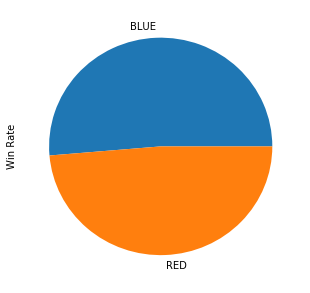

In [23]:
WinRate["matchid"].plot.pie(figsize = (5,5), label= "Win Rate")

In [24]:
new_matches.groupby("Blue_Team").count()

,matchid,Red_Team,Blue_1 id,Blue_2 id,Red_1 id,Red_2 id,Win
Blue_Team,,,,,,,
"Aatrox, Caitlyn",2,2,2,2,2,2,2
"Aatrox, Jhin",1,1,1,1,1,1,1
"Aatrox, Xayah",1,1,1,1,1,1,1
"Ahri, Alistar",1,1,1,1,1,1,1
"Ahri, Ashe",1,1,1,1,1,1,1
"Ahri, Bard",1,1,1,1,1,1,1
"Ahri, Braum",2,2,2,2,2,2,2
"Ahri, Camille",1,1,1,1,1,1,1
"Ahri, Draven",3,3,3,3,3,3,3


In [25]:
MATCHES = pd.read_csv("./ranked-matches/matches.csv")
MATCHES[MATCHES["seasonid"].isnull().values]
MATCHES = MATCHES[MATCHES["id"].isin(new_matches["matchid"])].reset_index(drop = True)

In [26]:
new_matches = new_matches.reset_index(drop=True)
new_matches["season"] = MATCHES["seasonid"]
new_matches["platform"] = MATCHES["platformid"]
new_matches

,matchid,Blue_Team,Red_Team,Blue_1 id,Blue_2 id,Red_1 id,Red_2 id,Win,season,platform
0,10,"Nami, Draven","Jinx, VelKoz",10,11,17,18,RED,8,EUW1
1,11,"Ziggs, Cassiopeia","Caitlyn, Karma",19,20,24,27,RED,8,EUW1
2,12,"Draven, Janna","Nami, Twitch",29,30,37,38,RED,8,EUW1
3,13,"Jinx, Zed","Tristana, Rakan",40,43,44,47,RED,8,EUW1
4,14,"Caitlyn, Zac","Lucian, Karma",52,53,54,56,RED,8,EUW1
5,15,"Miss Fortune, Thresh","Nami, Ziggs",59,62,64,67,BLUE,8,EUW1
6,16,"Lucian, Taric","Leona, Twitch",72,73,76,77,RED,8,EUW1
7,17,"Thresh, Jinx","VelKoz, Caitlyn",80,81,86,87,RED,8,EUW1
8,18,"Ashe, Zilean","Thresh, Caitlyn",90,91,94,98,RED,8,EUW1
9,19,"KogMaw, Janna","Lucian, Blitzcrank",101,102,105,106,BLUE,8,EUW1


In [27]:
new_matches["Blue_Team"] = new_matches["Blue_Team"].apply(lambda x: ', '.join(sorted(x.split(', '))))
new_matches["Red_Team"] = new_matches["Red_Team"].apply(lambda x: ', '.join(sorted(x.split(', '))))

In [28]:
#new_matches[new_matches["season"] == 8].groupby("Blue_Team").count().sort_values("matchid", ascending = False)[:-1]["matchid"]
new_matches.groupby("season").count()

,matchid,Blue_Team,Red_Team,Blue_1 id,Blue_2 id,Red_1 id,Red_2 id,Win,platform
season,,,,,,,,,
3,1829,1829,1829,1829,1829,1829,1829,1829,1829
4,340,340,340,340,340,340,340,340,340
5,3062,3062,3062,3062,3062,3062,3062,3062,3062
6,487,487,487,487,487,487,487,487,487
7,3899,3899,3899,3899,3899,3899,3899,3899,3899
8,167122,167122,167122,167122,167122,167122,167122,167122,167122


In [29]:
new_matches = new_matches[new_matches["season"] == 8]

In [30]:
blue_pick = new_matches.groupby("Blue_Team").count()["matchid"].sort_values(ascending = False)
red_pick = new_matches.groupby("Red_Team").count()["matchid"].sort_values(ascending = False)

In [31]:
combo_pick = blue_pick.add(red_pick, fill_value=0).sort_values(ascending = False)

In [32]:
red_win = new_matches[new_matches["Win"] == "RED"]
blue_win = new_matches[new_matches["Win"] == "BLUE"]

In [33]:
red_win = red_win.groupby("Red_Team").count()["matchid"].sort_values(ascending = False)
blue_win = blue_win.groupby("Blue_Team").count()["matchid"].sort_values(ascending = False)

In [34]:
combo_winrate = blue_win.add(red_win, fill_value=0).sort_values(ascending = False)

In [35]:
# combo_winrate
# combo_pick
combo_winrate.div(combo_pick, fill_value=0)

Aatrox, Ashe        0.500000
Aatrox, Caitlyn     0.333333
Aatrox, Draven      1.000000
Aatrox, Jhin        1.000000
Aatrox, Lucian      1.000000
Aatrox, Sona        0.000000
Aatrox, Tristana    0.000000
Aatrox, Xayah       0.000000
Ahri, Alistar       1.000000
Ahri, Ashe          0.000000
Ahri, Bard          0.000000
Ahri, Blitzcrank    0.500000
Ahri, Brand         0.333333
Ahri, Braum         0.500000
Ahri, Caitlyn       0.250000
Ahri, Camille       1.000000
Ahri, Corki         0.000000
Ahri, Draven        0.166667
Ahri, Ezreal        0.454545
Ahri, Galio         0.000000
Ahri, Janna         1.000000
Ahri, Jhin          0.714286
Ahri, Jinx          0.333333
Ahri, Kalista       0.500000
Ahri, Karma         0.666667
Ahri, Katarina      0.000000
Ahri, Kennen        1.000000
Ahri, LeBlanc       0.000000
Ahri, Leona         0.000000
Ahri, Lucian        0.409091
                      ...   
Vladimir, Zilean    0.000000
Volibear, Xayah     0.176471
Warwick, Xayah      0.666667
Warwick, Zilea

In [36]:
combo_win_df = pd.DataFrame(combo_winrate).reset_index()
combo_win_df = combo_win_df.rename(columns = {"index": "combo", "matchid": "win"})
combo_pick_df = pd.DataFrame(combo_pick).reset_index()
combo_pick_df = combo_pick_df.rename(columns = {"index": "combo", "matchid": "pick"})

In [69]:
combo_pick_df = combo_pick_df[combo_pick_df['pick'] > 100]
combo_pick_df = combo_pick_df.sort_values(by='combo').reset_index(drop=True)

In [70]:
combo_win_df = combo_win_df[combo_win_df['combo'].isin(combo_pick_df['combo'])]
combo_win_df = combo_win_df.sort_values(by='combo').reset_index(drop=True)

In [75]:
combo = pd.DataFrame()

In [76]:
combo['combo'] = combo_win_df['combo']

In [77]:
combo['win rate'] = combo_win_df['win'].div(combo_pick_df['pick'])

In [85]:
combo['pick rate'] = combo_pick_df['pick'].div(combo_pick_df['pick'].sum()) * 100

In [87]:
combo['pick'] = combo_pick_df['pick']
combo['win'] = combo_win_df['win']

In [103]:
# Scatter Plot Using Seaborn
plt.rc('font', size = 16)
sns.set_style('white')

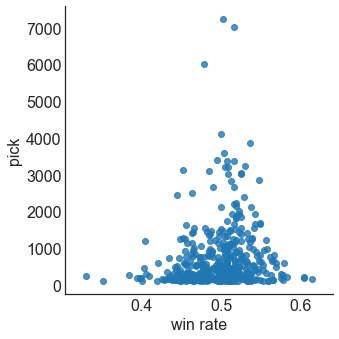

In [105]:
facet = sns.lmplot(data=combo, x='win rate', y='pick', 
                   fit_reg=False, legend=True, legend_out=True)